In [1]:
#Import environments:

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Data:

airport = pd.read_excel (r'C:\Users\nvhuy\Desktop\test_data.xlsx')

In [3]:
airport.shape

(4997, 20)

In [4]:
airport.isnull().values.any()

True

In [5]:
airport.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
ORIGIN                   0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME                 0
DEP_DELAY                0
DEP_DEL15                0
CRS_ARR_TIME             0
ARR_TIME                 0
ARR_DELAY                0
ARR_DEL15                0
CRS_ELAPSED_TIME         0
DISTANCE                 0
CRS_ELAPSED_TIME.1    4847
FLIGHTS               4847
DISTANCE.1            4847
dtype: int64

In [6]:
columns_to_drop = ["ORIGIN","ORIGIN_STATE","DEST","DEST_STATE"]

In [7]:
airport.fillna(value=0, inplace=True)
airport.isnull().values.any()

False

In [8]:
import math

for index, row in airport.iterrows():
    airport.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)
airport.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,CRS_ELAPSED_TIME.1,FLIGHTS,DISTANCE.1
0,2018,1,1,27,6,FLL,IAH,6,602,-13,0,808,756,-12,0,173,966,173.0,1.0,966.0
1,2018,1,1,27,6,SEA,SFO,6,614,-4,0,831,813,-18,0,133,679,133.0,1.0,679.0
2,2018,1,1,27,6,DCA,IAH,8,828,-2,0,1107,1108,1,0,217,1208,217.0,1.0,1208.0
3,2018,1,1,27,6,LAX,ORD,6,641,-9,0,1250,1242,-8,0,240,1744,240.0,1.0,1744.0
4,2018,1,1,27,6,JAX,EWR,18,1810,-14,0,2045,2021,-24,0,141,820,141.0,1.0,820.0


In [9]:
airport = pd.get_dummies(airport, columns=['ORIGIN','DEST'])
airport.head() 

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,...,DEST_SEA,DEST_SFO,DEST_SJC,DEST_SJU,DEST_SLC,DEST_SMF,DEST_SNA,DEST_TPA,DEST_TUS,DEST_TYS
0,2018,1,1,27,6,6,602,-13,0,808,...,0,0,0,0,0,0,0,0,0,0
1,2018,1,1,27,6,6,614,-4,0,831,...,0,1,0,0,0,0,0,0,0,0
2,2018,1,1,27,6,8,828,-2,0,1107,...,0,0,0,0,0,0,0,0,0,0
3,2018,1,1,27,6,6,641,-9,0,1250,...,0,0,0,0,0,0,0,0,0,0
4,2018,1,1,27,6,18,1810,-14,0,2045,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_x, test_x, train_y, test_y = train_test_split(airport.drop('ARR_DEL15', axis=1), airport['ARR_DEL15'], test_size=0.2, random_state=101)

In [11]:
train_x.shape

(3997, 193)

In [12]:
test_x.shape

(1000, 193)

In [13]:
reg = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.005, verbose=0, warm_start=False)
reg.fit(train_x, train_y)

C:\Users\nvhuy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.005, verbose=0, warm_start=False)

Accuracy: 98.7%
Recall: 86.81%
Confusion matrix:
[[908   1]
 [ 12  79]]
Area under the ROC curve: 0.06648412093956646


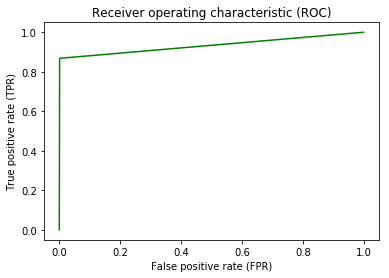

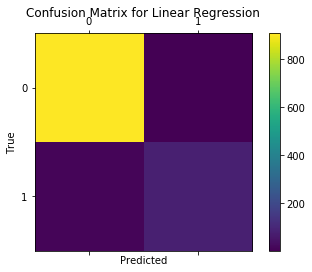

In [14]:
y_reg_pred = reg.predict(test_x)

labels = [0, 1]
cm = confusion_matrix(test_y, y_reg_pred,labels)

reg_accuracy = str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))
reg_recall = str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))

print('Accuracy: ' + reg_accuracy +'%')
print('Recall: ' + reg_recall +'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(test_y, y_reg_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for Linear Regression')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
gboost = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=101,
              subsample=1.0, tol=0.0001, validation_fraction=0.2,
              verbose=0, warm_start=False)
gboost.fit(train_x, train_y) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=101,
              subsample=1.0, tol=0.0001, validation_fraction=0.2,
              verbose=0, warm_start=False)

Accuracy: 98.2%
Recall: 80.22%
Confusion matrix:
[[909   0]
 [ 18  73]]
Area under the ROC curve: 0.09890109890109888


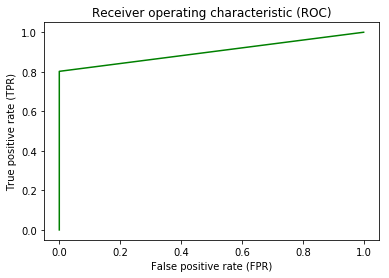

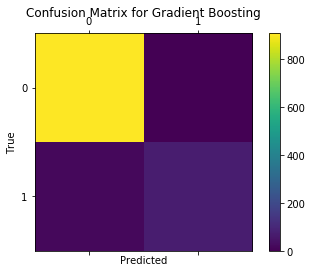

In [16]:
y_gboost_pred = gboost.predict(test_x)

labels = [0, 1]
cm = confusion_matrix(test_y, y_gboost_pred,labels)

gboost_accuracy = str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))
gboost_recall = str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))

print('Accuracy: ' + gboost_accuracy +'%')
print('Recall: ' + gboost_recall +'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(test_y, y_gboost_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for Gradient Boosting')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dtree.fit(train_x, train_y) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Accuracy: 95.3%
Recall: 70.33%
Confusion matrix:
[[889  20]
 [ 27  64]]
Area under the ROC curve: 0.1593527484616593


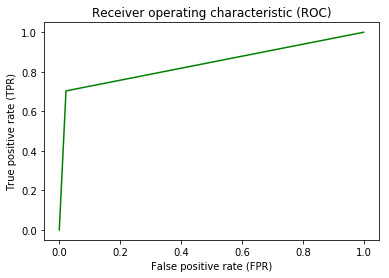

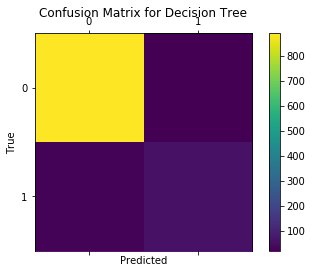

In [18]:
y_dtree_pred = dtree.predict(test_x)

labels = [0, 1]
cm = confusion_matrix(test_y, y_dtree_pred,labels)

dtree_accuracy = str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))
dtree_recall = str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))

print('Accuracy: ' + dtree_accuracy +'%')
print('Recall: ' + dtree_recall +'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(test_y, y_dtree_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for Decision Tree')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
rforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rforest.fit(train_x, train_y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Accuracy: 99.9%
Recall: 98.9%
Confusion matrix:
[[909   0]
 [  1  90]]
Area under the ROC curve: 0.005494505494505475


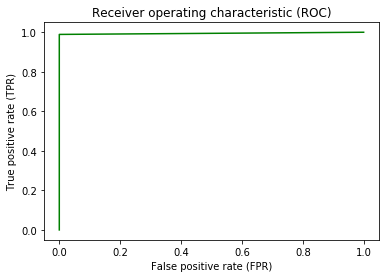

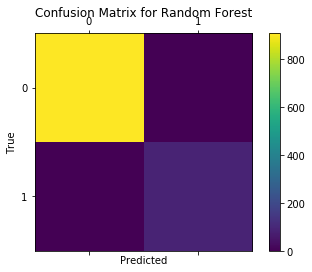

In [20]:
y_rforest_pred = rforest.predict(test_x)

labels = [0, 1]
cm = confusion_matrix(test_y, y_rforest_pred,labels)

rforest_accuracy = str(np.round(100*float(cm[0][0]+cm[1][1])/float((cm[0][0]+cm[1][1] + cm[1][0] + cm[0][1])),2))
rforest_recall = str(np.round(100*float((cm[1][1]))/float((cm[1][0]+cm[1][1])),2))

print('Accuracy: ' + rforest_accuracy +'%')
print('Recall: ' + rforest_recall +'%')
print('Confusion matrix:')
print(cm)

fpr, tpr, _ = roc_curve(test_y, y_rforest_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))

fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

fig = plt.figure(2)
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix for Random Forest')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()